# 📘 Lesson 2 — Automatic Differentiation: Gradients in Machine Learning

---

### 🎯 Why this lesson matters
In Machine Learning, we want models to **learn the best parameters (weights and biases)**.  
But how does the model know **which direction to move** to reduce error (loss)?  

👉 The answer is **Gradients**.  
- A gradient tells us how much a function increases or decreases when inputs change.  
- Training = adjusting parameters **in the opposite direction of the gradient** (Gradient Descent).  

This notebook explains **not only how to use autograd in PyTorch, but WHY it is the foundation of learning in ML**.


In [1]:
# Setup
import torch
import matplotlib.pyplot as plt
import numpy as np

torch.manual_seed(42)


## 1) What is a Gradient and Why Do We Need It?

- A **gradient** = derivative (slope of a curve).  
- It tells us how much a function changes when input changes.  
- In ML: gradients guide us to **update model parameters** so the loss goes down.

💡 Example:  
- Function: f(x) = x²  
- Derivative: f'(x) = 2x  
- At x=3 → slope=6 (function increases fast).  
- At x=-2 → slope=-4 (function decreases).  

👉 Without gradients, models cannot learn — because they wouldn’t know **how to change parameters**.


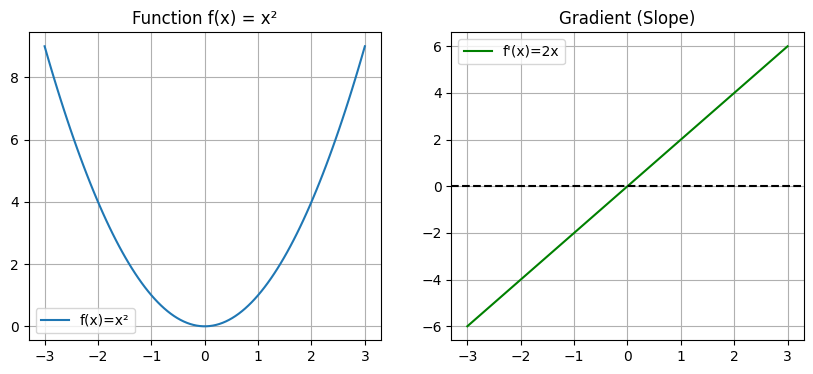

In [2]:
# Visualization: f(x) = x^2 and its gradient
x = np.linspace(-3, 3, 100)
y = x**2
gradients = 2*x

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(x,y,label="f(x)=x²")
plt.title("Function f(x) = x²")
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.plot(x,gradients,label="f'(x)=2x",color="green")
plt.axhline(0,color="k",linestyle="--")
plt.title("Gradient (Slope)")
plt.grid(True)
plt.legend()
plt.show()


## 2) `requires_grad=True` — Turning on Gradient Tracking

By default, tensors in PyTorch do **not** track gradients (saves memory).  
If we want PyTorch to compute gradients during training, we must set `requires_grad=True`.

👉 Why is this important?
- If `requires_grad=False` → no gradient, cannot train.  
- If `requires_grad=True` → PyTorch records all operations on the tensor and builds a **computational graph**.


In [3]:
# Tensor without gradient tracking
x_normal = torch.tensor(2.0)
print("x_normal:", x_normal, "requires_grad:", x_normal.requires_grad)

# Tensor with gradient tracking
x_grad = torch.tensor(2.0, requires_grad=True)
print("x_grad:", x_grad, "requires_grad:", x_grad.requires_grad)

# Turn on later
x_later = torch.tensor(3.0)
x_later.requires_grad_(True)
print("x_later with grad:", x_later)


x_normal: tensor(2.) requires_grad: False
x_grad: tensor(2., requires_grad=True) requires_grad: True
x_later with grad: tensor(3., requires_grad=True)


## 3) Computational Graph — Why PyTorch Remembers Operations

Every time you perform an operation on tensors with `requires_grad=True`,  
PyTorch builds a **computational graph** that remembers how the result was computed.

👉 Why is this important?  
Because during `.backward()`, PyTorch uses the **Chain Rule** to propagate gradients automatically.  
This is the core of backpropagation in neural networks.


In [4]:
# Simple graph: y = x^2
x = torch.tensor(3.0, requires_grad=True)
y = x**2
print("x:", x)
print("y:", y)
print("y.grad_fn:", y.grad_fn)  # remembers the operation


x: tensor(3., requires_grad=True)
y: tensor(9., grad_fn=<PowBackward0>)
y.grad_fn: <PowBackward0 object at 0x00000162B117E860>


In [5]:
# More complex chain of operations
x = torch.tensor(2.0, requires_grad=True)
a = x + 1
b = a * 2
c = b**2
y = c / 4

print("Computation chain:")
print("a =", a.item(), "| b =", b.item(), "| c =", c.item(), "| y =", y.item())
print("y.grad_fn:", y.grad_fn)


Computation chain:
a = 3.0 | b = 6.0 | c = 36.0 | y = 9.0
y.grad_fn: <DivBackward0 object at 0x00000162B128AFE0>


## 4) `.backward()` — Computing Gradients Automatically

Instead of calculating derivatives by hand, we let PyTorch do it.

👉 Why is this important?
- Neural networks have millions of parameters.  
- Manually deriving and coding derivatives is impossible.  
- Autograd makes training practical.


In [6]:
# Example 1: y = x^2
x = torch.tensor(3.0, requires_grad=True)
y = x**2
y.backward()
print("dy/dx =", x.grad)  # should be 2*3=6


dy/dx = tensor(6.)


In [7]:
# Example 2: more complex function
x = torch.tensor(2.0, requires_grad=True)
y = (x+1)**2 / 2
y.backward()
print("dy/dx =", x.grad)  # should equal x+1 = 3


dy/dx = tensor(3.)


## 5) Gradients of Multiple Variables

Most ML models have many parameters. We need **partial derivatives** with respect to each.

👉 Why is this important?
- Loss depends on many weights and biases.  
- Autograd computes **all partial derivatives** at once.


In [8]:
# z = x^2 + y^2
x = torch.tensor(3.0, requires_grad=True)
y = torch.tensor(4.0, requires_grad=True)
z = x**2 + y**2
z.backward()
print("dz/dx =", x.grad, "dz/dy =", y.grad)


dz/dx = tensor(6.) dz/dy = tensor(8.)


## 6) Gradients with Vectors and Matrices

👉 Why this matters:  
- Neural nets use vectors (weights) and matrices (layers).  
- We need gradients for all elements at once.


In [9]:
# Vector gradient
x = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)
y = torch.sum(x**2)
y.backward()
print("dy/dx =", x.grad)


dy/dx = tensor([2., 4., 6.])


In [10]:
# Matrix gradient
A = torch.tensor([[1.0,2.0],[3.0,4.0]], requires_grad=True)
y = torch.sum(A**2)
y.backward()
print("dy/dA =\n", A.grad)


dy/dA =
 tensor([[2., 4.],
        [6., 8.]])


## 7) Common Errors & Best Practices

1. ❌ Forgetting `requires_grad=True` → gradients are not tracked.  
2. ❌ Calling `.backward()` multiple times → gradients accumulate.  

👉 Why is this important?  
If we don’t clear (`zero_()`) gradients before each step, they will pile up and training will diverge.


In [11]:
# Example: accumulated gradients
x = torch.tensor(2.0, requires_grad=True)
for i in range(3):
    y = x**2
    y.backward()
    print(f"Step {i+1}: grad =", x.grad)  # accumulates!


Step 1: grad = tensor(4.)
Step 2: grad = tensor(8.)
Step 3: grad = tensor(12.)


In [12]:
# Fix: zero the gradient each iteration
x = torch.tensor(2.0, requires_grad=True)
for i in range(3):
    if x.grad is not None:
        x.grad.zero_()
    y = x**2
    y.backward()
    print(f"Step {i+1}: grad =", x.grad)


Step 1: grad = tensor(4.)
Step 2: grad = tensor(4.)
Step 3: grad = tensor(4.)


## 8) Application: Gradient Descent

Now let’s see WHY gradients are useful.  
We use them to update parameters and minimize loss.

👉 Idea:  
- Function: f(x) = (x-2)² + 1  
- Minimum at x=2.  
- Gradient descent will gradually move x toward 2.


In [ ]:
x = torch.tensor(0.0, requires_grad=True)
lr = 0.1

for step in range(50):
    f = (x-2)**2 + 1
    if x.grad is not None:
        x.grad.zero_()
    f.backward()
    with torch.no_grad():
        x -= lr * x.grad
    if step % 5 == 0:
        print(f"Step {step}: x={x.item():.3f}, f(x)={f.item():.3f}, grad={x.grad.item():.3f}")


Step 0: x=0.400, f(x)=5.000, grad=-4.000
Step 5: x=1.476, f(x)=1.429, grad=-1.311
Step 10: x=1.828, f(x)=1.046, grad=-0.429
Step 15: x=1.944, f(x)=1.005, grad=-0.141
Step 20: x=1.982, f(x)=1.001, grad=-0.046
Step 25: x=1.994, f(x)=1.000, grad=-0.015
